# 手寫英文字母辨識 -- CNN+資料增補

## 步驟1：載入 EMNIST 資料
#### 來源：[The EMNIST Dataset](https://www.nist.gov/itl/products-and-services/emnist-dataset)
#### 下載：[Kaggle](https://www.kaggle.com/datasets/crawford/emnist)

In [1]:
!pip install emnist

In [2]:
import tensorflow as tf

In [3]:
from emnist import list_datasets
list_datasets()

['balanced', 'byclass', 'bymerge', 'digits', 'letters', 'mnist']

In [4]:
# 載入 EMNIST 資料
from emnist import extract_training_samples
from emnist import extract_test_samples

(x_train, y_train),(x_test, y_test) = extract_training_samples('letters'), extract_test_samples('letters')

# 訓練/測試資料的 X/y 維度
print(x_train.shape, y_train.shape,x_test.shape, y_test.shape)

(124800, 28, 28) (124800,) (20800, 28, 28) (20800,)


In [5]:
# 訓練資料前10筆圖片的數字
y_train[:10]

array([23,  7, 16, 15, 23, 17, 13, 11, 22, 24], dtype=uint8)

In [6]:
import numpy as np

np.unique(y_train)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26], dtype=uint8)

In [7]:
y_train = y_train - 1
y_test = y_test - 1

In [8]:
class_names = [chr(ord('A')+i) for i in range(26)]
''.join(class_names)

'ABCDEFGHIJKLMNOPQRSTUVWXYZ'

In [9]:
np.array(class_names)[y_train[:10]]

array(['W', 'G', 'P', 'O', 'W', 'Q', 'M', 'K', 'V', 'X'], dtype='<U1')

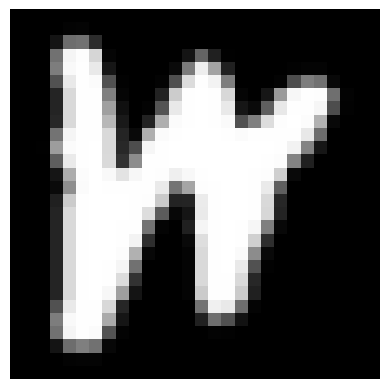

In [10]:
# 顯示第1張圖片圖像
import matplotlib.pyplot as plt

# 第一筆資料
X2 = x_train[0,:,:]

# 繪製點陣圖，cmap='gray':灰階
plt.imshow(X2.reshape(28,28), cmap='gray')

# 隱藏刻度
plt.axis('off') 

# 顯示圖形
plt.show() 

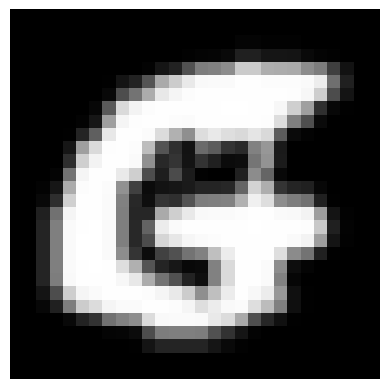

In [11]:
# 顯示第1張圖片圖像
import matplotlib.pyplot as plt

# 第一筆資料
X2 = x_train[1,:,:]

# 繪製點陣圖，cmap='gray':灰階
plt.imshow(X2.reshape(28,28), cmap='gray')

# 隱藏刻度
plt.axis('off') 

# 顯示圖形
plt.show() 

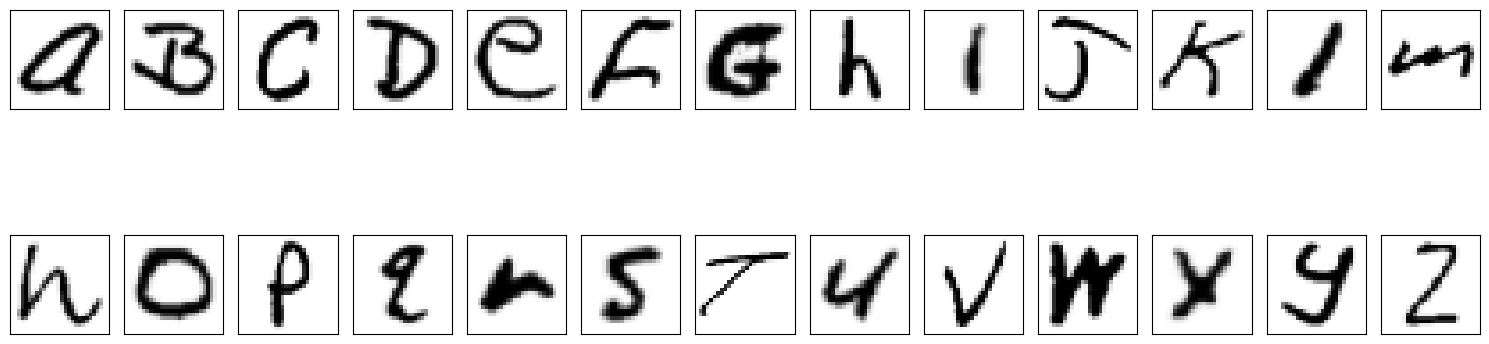

In [12]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=2, ncols=13, sharex=True, sharey=True)
fig.set_figheight(6)
fig.set_figwidth(15)
ax = ax.flatten()
for i in range(26):
    img = x_train[y_train == i][0].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
# plt.savefig('images/12_5.png', dpi=300)
plt.show()

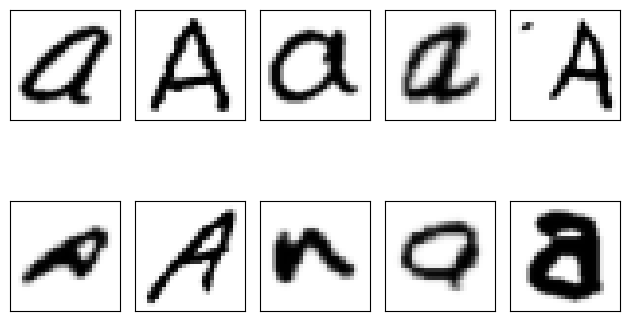

In [13]:
no=0
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True,)
ax = ax.flatten()
for i in range(10):
    img = x_train[y_train == no][i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
# plt.savefig('images/12_5.png', dpi=300)
plt.show()

## 步驟2：資料清理，此步驟無需進行

## 步驟3：進行特徵工程，將特徵縮放成(0, 1)之間

In [14]:
# 特徵縮放，使用常態化(Normalization)，公式 = (x - min) / (max - min)
# 顏色範圍：0~255，所以，公式簡化為 x / 255
# 注意，顏色0為白色，與RGB顏色不同，(0,0,0) 為黑色。
x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0
x_train_norm[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.01176471,
        0.01568627, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.07843137, 0.42745098,
        0.44705882, 0.17647059, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

## 步驟4：資料分割，此步驟無需進行，載入MNIST資料時，已經切割好了

## 步驟5：建立模型結構

In [15]:
from tensorflow.keras.layers import *

input_shape=(28, 28, 1)
model = tf.keras.models.Sequential()
model.add(tf.keras.Input(shape=input_shape))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(26, activation='softmax'))

In [16]:
# 設定優化器(optimizer)、損失函數(loss)、效能衡量指標(metrics)的類別
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## 步驟6：結合訓練資料及模型，進行模型訓練

In [17]:
# 增加一維在最後面
x_train_norm = np.expand_dims(x_train_norm, -1)
x_test_norm = np.expand_dims(x_test_norm, -1)

### 資料增補

In [18]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        rotation_range=10,
        zoom_range=0.1,
        width_shift_range=0.1,
        height_shift_range=0.1)

In [19]:
# 模型訓練
batch_size=64
history = model.fit(datagen.flow(x_train_norm, y_train), epochs=10,
          validation_data=datagen.flow(x_test_norm, y_test, batch_size=batch_size), verbose=2)

Epoch 1/10


c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


3900/3900 - 254s - 65ms/step - accuracy: 0.7403 - loss: 0.8406 - val_accuracy: 0.8959 - val_loss: 0.3230
Epoch 2/10
3900/3900 - 383s - 98ms/step - accuracy: 0.8659 - loss: 0.4256 - val_accuracy: 0.9139 - val_loss: 0.2680
Epoch 3/10
3900/3900 - 235s - 60ms/step - accuracy: 0.8864 - loss: 0.3640 - val_accuracy: 0.9217 - val_loss: 0.2404
Epoch 4/10
3900/3900 - 172s - 44ms/step - accuracy: 0.8942 - loss: 0.3346 - val_accuracy: 0.9218 - val_loss: 0.2344
Epoch 5/10
3900/3900 - 152s - 39ms/step - accuracy: 0.8992 - loss: 0.3143 - val_accuracy: 0.9220 - val_loss: 0.2267
Epoch 6/10
3900/3900 - 203s - 52ms/step - accuracy: 0.9018 - loss: 0.3085 - val_accuracy: 0.9279 - val_loss: 0.2248
Epoch 7/10
3900/3900 - 267s - 68ms/step - accuracy: 0.9041 - loss: 0.3019 - val_accuracy: 0.9260 - val_loss: 0.2239
Epoch 8/10
3900/3900 - 238s - 61ms/step - accuracy: 0.9072 - loss: 0.2927 - val_accuracy: 0.9237 - val_loss: 0.2288
Epoch 9/10
3900/3900 - 181s - 46ms/step - accuracy: 0.9076 - loss: 0.2913 - val_acc

In [20]:
# 檢查 history 所有鍵值
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

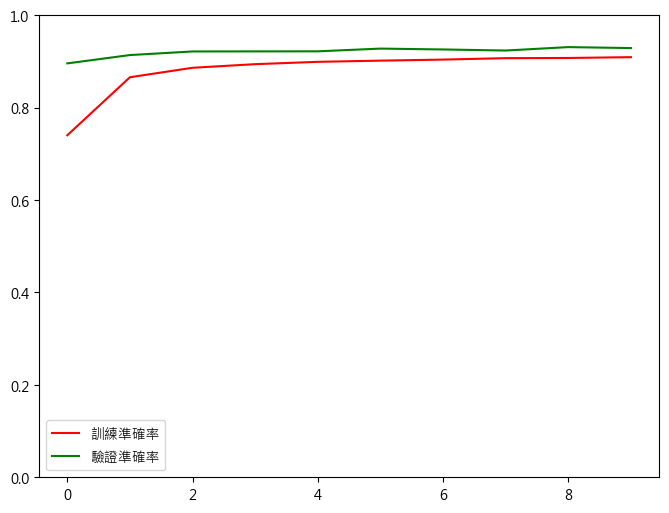

In [21]:
# 對訓練過程的準確率繪圖
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], 'r', label='訓練準確率')
plt.plot(history.history['val_accuracy'], 'g', label='驗證準確率')
plt.ylim([0,1])
plt.legend()

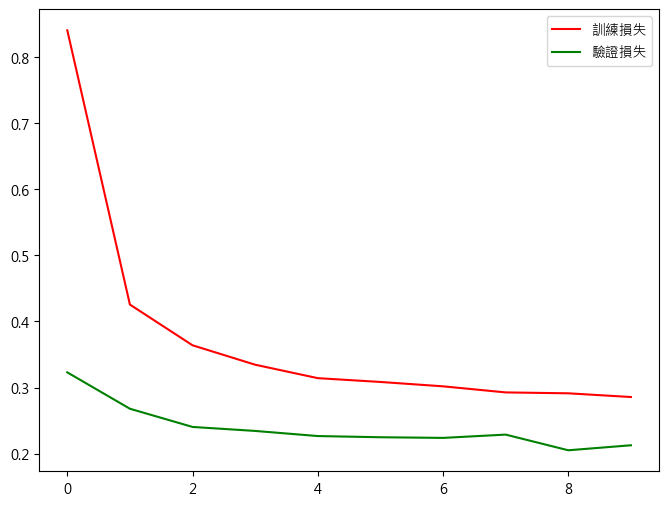

In [22]:
# 對訓練過程的損失繪圖
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], 'r', label='訓練損失')
plt.plot(history.history['val_loss'], 'g', label='驗證損失')
plt.legend()

## 步驟7：評分(Score Model)

In [23]:
# 評分(Score Model)
score=model.evaluate(x_test_norm, y_test, verbose=0)

for i, x in enumerate(score):
    print(f'{model.metrics_names[i]}: {score[i]:.4f}')

loss: 0.1802
compile_metrics: 0.9412


In [24]:
# 實際預測 20 筆資料
# predictions = model.predict_classes(x_test_norm)
import numpy as np
predictions = np.argmax(model.predict(x_test_norm), axis=-1)

# 比對
print('actual    :', [class_names[i] for i in y_test[0:20]])
print('prediction:', [class_names[i] for i in predictions[0:20]])

650/650 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step
actual    : ['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A']
prediction: ['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A']


In [25]:
random_list = np.random.randint(0, x_test_norm.shape[0], 20)
# 比對
print('actual    :', [class_names[i] for i in y_test[random_list]])
print('prediction:', [class_names[i] for i in predictions[random_list]])

actual    : ['X', 'W', 'U', 'S', 'F', 'F', 'M', 'Z', 'U', 'Y', 'X', 'K', 'E', 'D', 'S', 'S', 'E', 'A', 'R', 'R']
prediction: ['X', 'W', 'U', 'S', 'F', 'F', 'M', 'Z', 'U', 'Y', 'X', 'K', 'E', 'D', 'S', 'S', 'E', 'A', 'R', 'R']


In [26]:
# 顯示第 4 筆的機率
import numpy as np

predictions = model.predict(x_test_norm[3:4], verbose=0)
print(f'0~9預測機率: {np.around(predictions, 2)}')

0~9預測機率: [[0.87 0.   0.   0.   0.   0.   0.09 0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.04 0.   0.   0.   0.   0.   0.   0.   0.   0.  ]]


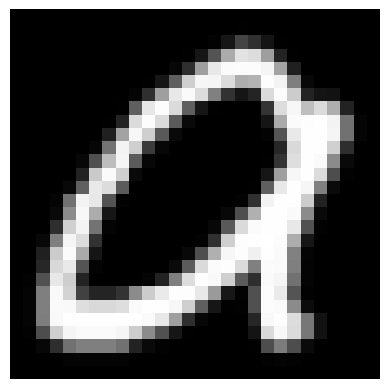

In [27]:
# 顯示第 4 筆圖像
X2 = x_test[3,:,:]
plt.imshow(X2.reshape(28,28), cmap='gray')
plt.axis('off')
plt.show() 

In [28]:
import pandas as pd 
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
predictions = np.argmax(model.predict(x_test_norm, verbose=0), axis=-1)
pd.crosstab(y_test, predictions, rownames=['實際值'], colnames=['預測值'])

預測值,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
實際值,,,,,,,,,,,,,,,,,,,,,,,,,,
0,764,1,1,3,0,1,2,5,0,0,0,0,0,2,0,0,15,1,0,0,2,0,2,0,0,1
1,0,788,0,1,1,0,0,5,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,2
2,1,0,768,1,15,0,1,0,0,0,0,6,0,0,1,0,0,1,1,3,2,0,0,0,0,0
3,2,1,0,759,0,0,1,0,0,2,0,0,0,1,24,5,4,0,0,1,0,0,0,0,0,0
4,1,0,3,1,786,0,3,0,1,0,0,1,0,0,0,1,0,1,1,1,0,0,0,0,0,0
5,0,0,0,0,8,769,4,0,1,0,0,0,0,0,0,3,0,2,1,10,0,0,0,0,1,1
6,11,8,0,2,1,0,630,0,0,1,0,0,0,1,0,1,138,0,5,0,0,0,0,0,2,0
7,1,7,0,0,0,0,0,765,0,0,9,2,0,13,0,0,0,1,0,0,0,0,1,1,0,0
8,0,3,1,0,1,1,0,3,579,25,0,181,0,0,0,0,0,1,0,1,0,1,0,0,2,1


## 步驟8：評估，暫不進行

## 步驟9：模型佈署

In [29]:
# 模型存檔
model.save('emnist_cnn_model.keras')

# 模型載入
# model = tf.keras.models.load_model('emnist_cnn_model.h5')

## 步驟10：新資料預測

In [30]:
# 使用小畫家，繪製 0~9，實際測試看看
from skimage import io
from skimage.transform import resize
import numpy as np

# 讀取影像並轉為單色
uploaded_file = './myData/A.png'
image1 = io.imread(uploaded_file, as_gray=True)
print(image1.shape)

# 縮為 (28, 28) 大小的影像
image_resized = resize(image1, (28, 28), anti_aliasing=True)    
X1 = image_resized.reshape(1,28, 28, 1) #/ 255

# 反轉顏色，顏色0為白色，與 RGB 色碼不同，它的 0 為黑色
X1 = np.abs(1-X1)

# 預測
#predictions = model.predict_classes(X1)
predictions = np.argmax(model.predict(X1, verbose=0), axis=-1)
print(predictions)

(280, 280)
[0]


In [31]:
class_names[predictions[0]]

'A'

In [32]:
# 掃描 A~Z 檔案
predict_list=''
for i in range(26):
    uploaded_file = f'./myData/{chr(ord("A")+i)}.png'
    image1 = io.imread(uploaded_file, as_gray=True)

    # 縮為 (28, 28) 大小的影像
    image_resized = resize(image1, (28, 28), anti_aliasing=True)    
    X1 = image_resized.reshape(1,28, 28, 1) #/ 255

    # 反轉顏色，顏色0為白色，與 RGB 色碼不同，它的 0 為黑色
    X1 = np.abs(1-X1)

    # 預測
    #predictions = model.predict_classes(X1)
    predictions = np.argmax(model.predict(X1, verbose=0), axis=-1)
    predict_list += class_names[predictions[0]]
print('actual    :', ''.join([class_names[i] for i in range(26)]))
print('prediction:', predict_list)

actual    : ABCDEFGHIJKLMNOPQRSTUVWXYZ
prediction: ABCDEFGHIJKLMNOPQRSTUVWXYZ


In [33]:
# 掃描目錄下所有檔案
import os

data_path = './myData/'
actual_list=''
predict_list=''
for uploaded_file in os.listdir(data_path):
    if not uploaded_file.endswith(".png"): continue
    image1 = io.imread(data_path + uploaded_file, as_gray=True)

    # 縮為 (28, 28) 大小的影像
    image_resized = resize(image1, (28, 28), anti_aliasing=True)    
    X1 = image_resized.reshape(1,28, 28) #/ 255

    # 反轉顏色，顏色0為白色，與 RGB 色碼不同，它的 0 為黑色
    X1 = np.abs(1-X1)

    # 預測
    #predictions = model.predict_classes(X1)
    predictions = np.argmax(model.predict(X1, verbose=0), axis=-1)
    predict_list += class_names[predictions[0]]
    actual_list += uploaded_file.split('.')[0]
print('actual    :', actual_list)
print('prediction:', predict_list)

ValueError: Exception encountered when calling Sequential.call().

[1mCannot take the length of shape with unknown rank.[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=<unknown>, dtype=float32)
  • training=False
  • mask=None